# Random Forest using Scikit-Learn

#### Python Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline
plt.style.use('seaborn')

#### Load and Display the Palmer Penguins Data Set
Source: [Palmer Penguins Data Set](https://vincentarelbundock.github.io/Rdatasets/csv/palmerpenguins/penguins.csv)

**Attribute**

1. species: denotes the penguin species (Adelie, Chinstrap, and Gentoo)
2. island: denotes the island in Palmer Archipelago, Antarctica (Biscoe, Dream, or Torgersen)
3. bill_length_mm: denotes the penguins beak length (millimeters)
4. bill_depth_mm: denotes the penguins beak depth (millimeters)
5. flipper_length_mm: denotes the penguins flipper length (millimeters)
6. body_mass_g: denotes the penguins body mass (grams)
7. sex: denotes the penguins sex (female, male)
8. year: denotes the study year (2007, 2008, or 2009)

In [3]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/palmerpenguins/penguins.csv'
penguins_df = pd.read_csv(url)
penguins_df = penguins_df.drop(penguins_df.columns[0], axis=1)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


#### Display feature information about the Palmer Penguins data set

In [4]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


#### Display the rows with missing values in `bill_length_mm`, `bill_depth_mm`, and `flipper_length_mm`

In [5]:
penguins_df[penguins_df['bill_length_mm'].isnull() | penguins_df['bill_depth_mm'].isnull() | penguins_df['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


#### Drop rows with missing values for majority of the columns

Given that mot of the columns are missing for the rows at index 3 and 271, it is better to drop them

In [6]:
penguins_df = penguins_df.drop([3, 271], axis=0)

#### Display the rows with missing values in `sex`

In [7]:
penguins_df[penguins_df['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


#### Display a bar plot of `bill_length_mm` for the different `species`

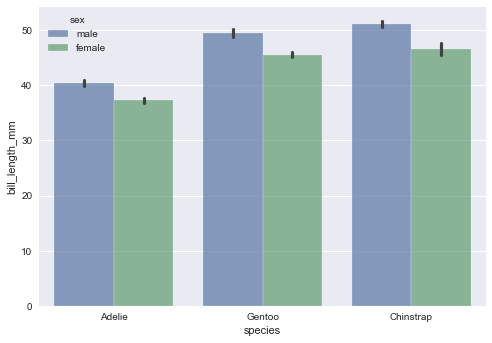

In [8]:
sns.barplot(data=penguins_df, x='species', y='bill_length_mm', hue='sex', alpha=0.7)
plt.show()

#### Display a bar plot of `bill_depth_mm` for the different `species`

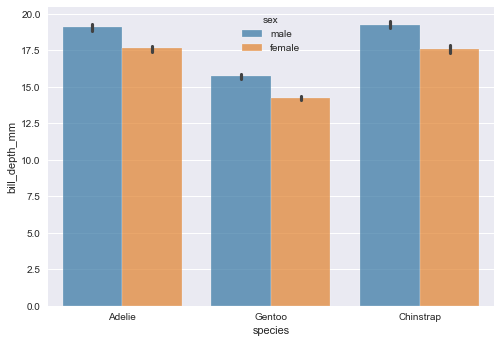

In [9]:
sns.barplot(data=penguins_df, x='species', y='bill_depth_mm', hue='sex', palette='tab10', alpha=0.7)
plt.show()

#### Display a bar plot of `body_mass_g` for the different `species`

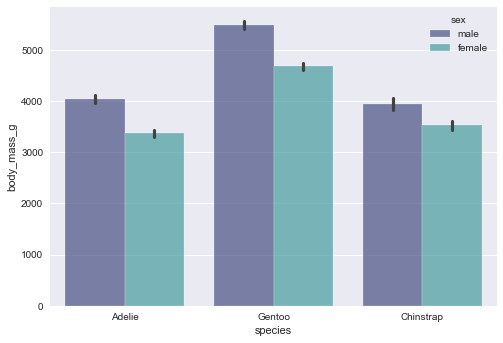

In [10]:
sns.barplot(data=penguins_df, x='species', y='body_mass_g', hue='sex', palette='mako', alpha=0.7)
plt.show()

#### Create dataframe without the `year` for gathering summary statistics on other features

In [30]:
pdf = penguins_df.drop('year', axis=1)

#### Display summary statistics for (species == 'Adelie' and island == 'Torgesen') grouped by `sex`

In [31]:
df = pdf[(pdf['species'] == 'Adelie') & (pdf['island'] == 'Torgersen')].groupby('sex').describe()
df.T

sex                           female         male
bill_length_mm    count    27.000000    24.000000
                  mean     37.444444    40.645833
                  std       2.182506     2.974965
                  min      33.500000    34.600000
                  25%      35.800000    38.975000
                  50%      37.800000    41.250000
                  75%      38.950000    42.575000
                  max      41.100000    46.000000
bill_depth_mm     count    27.000000    24.000000
                  mean     17.544444    19.425000
                  std       0.840482     1.071468
                  min      15.900000    17.600000
                  25%      17.050000    18.575000
                  50%      17.400000    19.300000
                  75%      17.950000    20.275000
                  max      19.300000    21.500000
flipper_length_mm count    27.000000    24.000000
                  mean    188.074074   194.708333
                  std       4.763046     5.871665
                  min     176.000000   181.000000
                  25%     186.000000   190.750000
                  50%     189.000000   195.000000
                  75%     191.000000   198.000000
                  max     196.000000   210.000000
body_mass_g       count    27.000000    24.000000
                  mean   3406.481481  4043.750000
                  std     251.876858   366.923905
                  min    2900.000000  3325.000000
                  25%    3225.000000  3793.750000
                  50%    3450.000000  4000.000000
                  75%    3612.500000  4262.500000
                  max    3800.000000  4700.000000

#### Fill in the missing values for rows where (species == 'Adelie' and island == 'Torgesen')

Comparing the mean values of the features (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`) with the ones in the rows at index 8, 10, 11, we can infer the value for `sex` to be **female**. Similarly, the value of `sex` for the row at index 9 is **male**

In [12]:
penguins_df.loc[[8, 10, 11], 'sex'] = 'female'
penguins_df.at[9, 'sex'] = 'male'

#### Display summary statistics for (species == 'Adelie' and island == 'Dream') grouped by `sex`

In [32]:
df = pdf[(pdf['species'] == 'Adelie') & (pdf['island'] == 'Dream')].groupby('sex').describe()
df.T

sex                           female         male
bill_length_mm    count    28.000000    28.000000
                  mean     36.932143    40.071429
                  std       2.053011     1.748196
                  min      32.100000    36.300000
                  25%      36.000000    39.150000
                  50%      36.850000    40.250000
                  75%      37.725000    41.100000
                  max      42.200000    44.100000
bill_depth_mm     count    28.000000    28.000000
                  mean     17.664286    18.839286
                  std       0.913363     1.033276
                  min      15.500000    17.000000
                  25%      17.075000    18.100000
                  50%      17.800000    18.650000
                  75%      18.500000    19.275000
                  max      19.300000    21.200000
flipper_length_mm count    28.000000    28.000000
                  mean    187.535714   191.928571
                  std       5.660010     6.803749
                  min     178.000000   178.000000
                  25%     184.750000   188.500000
                  50%     187.500000   190.500000
                  75%     191.000000   196.000000
                  max     202.000000   208.000000
body_mass_g       count    28.000000    28.000000
                  mean   3331.250000  4045.535714
                  std     219.492787   330.547636
                  min    2900.000000  3425.000000
                  25%    3168.750000  3875.000000
                  50%    3375.000000  3987.500000
                  75%    3481.250000  4300.000000
                  max    3700.000000  4650.000000

#### Fill in the missing values for the row where (species == 'Adelie' and island == 'Dream')

Comparing the mean values of the features (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`) with the ones in the row at index 47, we can infer the value for `sex` to be **female**

In [14]:
penguins_df.at[47, 'sex'] = 'female'

#### Display summary statistics for (species == 'Gentoo' and island == 'Biscoe') grouped by `sex`

In [33]:
df = pdf[(pdf['species'] == 'Gentoo') & (pdf['island'] == 'Biscoe')].groupby('sex').describe()
df.T

sex                           female         male
bill_length_mm    count    62.000000    61.000000
                  mean     45.567742    49.473770
                  std       2.006201     2.720594
                  min      40.900000    44.400000
                  25%      44.125000    48.100000
                  50%      45.500000    49.500000
                  75%      46.875000    50.500000
                  max      50.500000    59.600000
bill_depth_mm     count    62.000000    61.000000
                  mean     14.258065    15.718033
                  std       0.557673     0.741060
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.300000    15.700000
                  75%      14.600000    16.100000
                  max      15.700000    17.300000
flipper_length_mm count    62.000000    61.000000
                  mean    212.903226   221.540984
                  std       3.852654     5.673252
                  min     203.000000   208.000000
                  25%     210.000000   218.000000
                  50%     213.000000   221.000000
                  75%     216.000000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    62.000000    61.000000
                  mean   4673.790323  5484.836066
                  std     283.256365   313.158596
                  min    3950.000000  4750.000000
                  25%    4462.500000  5300.000000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000

#### Fill in the missing values for rows where (species == 'Gentoo' and island == 'Biscoe')

Comparing the mean values of the features (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`) with the ones in the rows at index 178, 218, 256, 268, we can infer the value for `sex` to be **female**

In [16]:
penguins_df.loc[[178, 218, 256, 268], 'sex'] = 'female'

#### Display feature information about the Palmer Penguins data set after the fixes

In [17]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 32.1+ KB


#### Encode the categorical features `island` and `sex`

In [18]:
nom_features = ['island', 'sex']
nom_encoded_df = pd.get_dummies(penguins_df[nom_features], prefix_sep='.', drop_first=True, sparse=False)
nom_encoded_df

,island.Dream,island.Torgersen,sex.male
0,0,1,1
1,0,1,0
2,0,1,0
4,0,1,0
5,0,1,1
...,...,...,...
339,1,0,1
340,1,0,0
341,1,0,1
342,1,0,1


#### Replace categorical features with encoded features

In [19]:
penguins_df2 = penguins_df.drop(penguins_df[nom_features], axis=1)
penguins_df3 = pd.concat([penguins_df2, nom_encoded_df], axis=1)
penguins_df3

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island.Dream,island.Torgersen,sex.male
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,2007,0,1,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,2009,1,0,1
340,Chinstrap,43.5,18.1,202.0,3400.0,2009,1,0,0
341,Chinstrap,49.6,18.2,193.0,3775.0,2009,1,0,1
342,Chinstrap,50.8,19.0,210.0,4100.0,2009,1,0,1


#### Create the training and testing data sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(penguins_df3, penguins_df3['species'], test_size=0.25, random_state=101)

#### Drop the target from the training and testing data sets

In [21]:
X_train = X_train.drop('species', axis=1)
X_test = X_test.drop('species', axis=1)

#### Initialize and fit the RandomForest model

The hyperparameter `n_estimators` indicates the number of Decision Trees to use - a typical value is between 64 and 128. Note that we are not using the hyperparameter `oob_score` which is related to out-of-bag errors

In [22]:
model = RandomForestClassifier(max_depth=4, n_estimators=64, random_state=101)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=64, random_state=101)

#### Predict the target `species` using the testing data set

In [23]:
y_predict = model.predict(X_test)

#### Display the accuracy score

In [24]:
accuracy_score(y_test, y_predict)

0.9883720930232558